In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [21]:
trips = pd.read_csv('../data/trips.csv',parse_dates=['pickup_datetime','dropoff_datetime'])

trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11308202 entries, 0 to 11308201
Data columns (total 20 columns):
 #   Column             Dtype         
---  ------             -----         
 0   medallion          object        
 1   hack_license       object        
 2   vendor_id          object        
 3   rate_code          int64         
 4   pickup_datetime    datetime64[ns]
 5   dropoff_datetime   datetime64[ns]
 6   passenger_count    int64         
 7   trip_time_in_secs  int64         
 8   trip_distance      float64       
 9   pickup_longitude   float64       
 10  pickup_latitude    float64       
 11  dropoff_longitude  float64       
 12  dropoff_latitude   float64       
 13  payment_type       object        
 14  fare_amount        float64       
 15  surcharge          float64       
 16  mta_tax            float64       
 17  tip_amount         float64       
 18  tolls_amount       float64       
 19  total_amount       float64       
dtypes: datetime64[ns](2), 

In [22]:
trips.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.50000,-73.95785,40.76532,-73.97627,40.78565,CRD,11.00000,1.00000,0.50000,2.50000,0.00000,15.00000
1,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.90000,-73.97812,40.76345,-73.95567,40.77664,CRD,10.00000,1.00000,0.50000,3.45000,0.00000,14.95000
2,EE75E5927D00739AC342810C336A825E,1B4E92431F9DA4D49874EC76E769E874,CMT,1,2013-04-05 02:48:11,2013-04-05 02:51:21,2,189,0.70000,-73.98519,40.75493,-73.99078,40.74800,CRD,4.50000,0.50000,0.50000,1.10000,0.00000,6.60000
3,3B5DA0DE0868F37FD41204DB36CE87CA,BC7B6E5A0132450CAE072F3C8F60BBE4,CMT,1,2013-04-05 06:16:10,2013-04-05 06:22:05,1,354,1.20000,-73.98517,40.76342,-73.97887,40.75114,CRD,6.50000,0.00000,0.50000,1.00000,0.00000,8.00000
4,75FEF473DB69BA7BC5D61F5635792E1E,FCD2C03A60D84CE91A4DEB5E6A097FCF,CMT,1,2013-04-04 19:20:16,2013-04-04 19:30:52,1,635,0.40000,-73.97848,40.76123,-73.98457,40.75941,CRD,7.50000,1.00000,0.50000,2.25000,0.00000,11.25000


In [23]:
trips.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,11308202.00000,11308202.00000,11308202.00000,11308202.00000,11308202.00000,11308202.00000,11308202.00000,11308202.00000,11308202.00000,11308202.00000,11308202.00000,11308202.00000,11308202.00000,11308202.00000
mean,1.02284,1.71049,725.51497,2.79641,-73.96955,40.75549,-73.96849,40.75647,11.83751,0.32469,0.49979,1.26634,0.25703,14.18536
std,0.24769,1.39063,547.45298,3.36356,0.03464,0.02691,0.03229,0.03016,9.39296,0.37000,0.01016,2.01152,1.14764,11.30906
min,0.00000,1.00000,1.00000,0.01000,-73.99999,40.03132,-73.99999,40.01667,2.50000,0.00000,0.00000,0.00000,0.00000,2.50000
25%,1.00000,1.00000,360.00000,1.00000,-73.98744,40.74380,-73.98608,40.74379,6.50000,0.00000,0.50000,0.00000,0.00000,7.80000
50%,1.00000,1.00000,596.00000,1.70000,-73.97819,40.75834,-73.97649,40.75864,9.00000,0.00000,0.50000,0.50000,0.00000,10.50000
75%,1.00000,2.00000,926.00000,3.00000,-73.96359,40.77137,-73.96072,40.77279,13.50000,0.50000,0.50000,1.95000,0.00000,15.50000
max,210.00000,6.00000,10800.00000,100.00000,-73.00239,40.99770,-73.00239,40.99977,500.00000,15.00000,0.50000,200.00000,20.00000,500.00000


# a.	What is the distribution of number of passengers per trip?

In [24]:
trips.passenger_count.value_counts().sort_index()

1    8029896
2    1475300
3     449672
4     216097
5     674800
6     462437
Name: passenger_count, dtype: int64

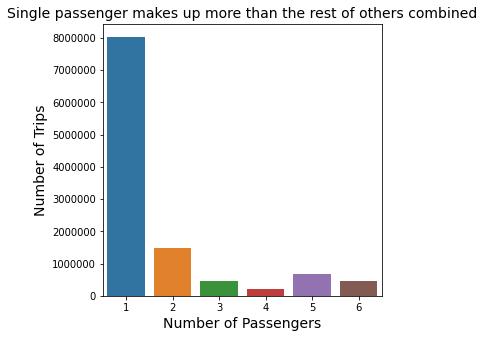

In [25]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x='passenger_count', data = trips, ax=ax)
ax.set_title('Single passenger makes up more than the rest of others combined', fontsize=14)
ax.set_xlabel('Number of Passengers', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Single passenger trips makes up more than the rest of them combined.

# b.	What is the distribution of payment_type?

In [26]:
trips.payment_type.value_counts()

CRD    5869656
CSH    5406767
NOC      20696
DIS       7686
UNK       3397
Name: payment_type, dtype: int64

Expanding abbreviations, we get 

CRD: Credit Card,
CSH: Cash,
NOC: No charge,
DIS: Dispute,
UNK: Unknown

Since NOC, DIS and UNK do not give any information about type of payment, we will limit our analysis to card and cash only.

In [27]:
payments = trips.payment_type.value_counts().reset_index()[:2]
payments = payments.rename(columns={'index':'payment_type','payment_type':'count'})
payments['percent'] = round((payments['count'] / payments['count'].sum()) * 100 , 1)
payments.drop(columns=['count'],inplace=True)
payments = payments.replace('CRD','Credit Card')
payments = payments.replace('CSH','Cash')
payments.set_index('payment_type',inplace=True)
payments

,percent
payment_type,
Credit Card,52.10000
Cash,47.90000


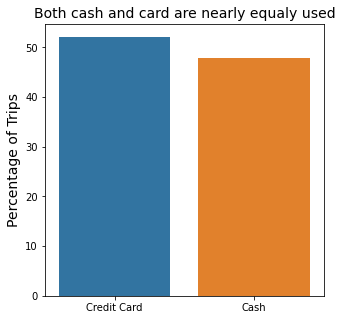

In [28]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.barplot(x=payments.index, y ='percent' , data = payments)
ax.set_title('Both cash and card are nearly equaly used', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Trips', fontsize=14)
plt.show()

Seems like both the payment types are equally used in the data.

# c.	What is the distribution of fare amount?

In [29]:
trips.fare_amount.describe()

count   11308202.00000
mean          11.83751
std            9.39296
min            2.50000
25%            6.50000
50%            9.00000
75%           13.50000
max          500.00000
Name: fare_amount, dtype: float64

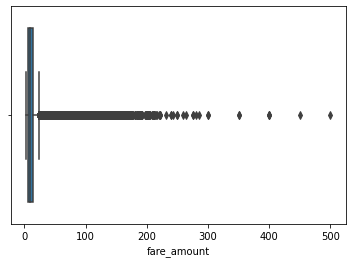

In [30]:
sns.boxplot(x=trips.fare_amount)
plt.show()

In [31]:
# Remove upper 1% of points
p_upper = np.percentile(trips.fare_amount, 99.0)
p_upper

amount = trips[trips.fare_amount<p_upper]

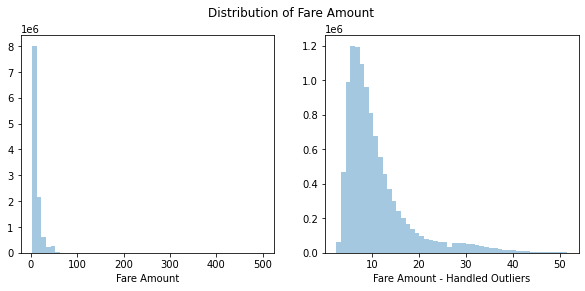

In [32]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(trips.fare_amount, ax=ax[0], kde=False)
# Removed upper 1% fare_amounts 
ax[1] = sns.distplot(amount.fare_amount, ax=ax[1], kde=False)
ax[0].set_xlabel('Fare Amount')
ax[1].set_xlabel('Fare Amount - Handled Outliers')
fig.suptitle('Distribution of Fare Amount')
plt.show()

We get a better looking distribution after handling the outliers. Even then, it looks right skewed.

# d.	What is the distribution of tip amount?

In [33]:
trips.tip_amount.describe()

count   11308202.00000
mean           1.26634
std            2.01152
min            0.00000
25%            0.00000
50%            0.50000
75%            1.95000
max          200.00000
Name: tip_amount, dtype: float64

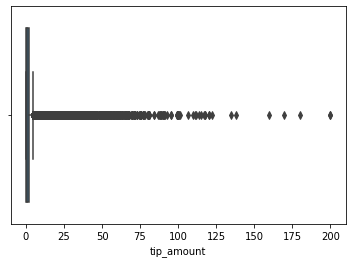

In [34]:
sns.boxplot(x=trips.tip_amount)
plt.show()

In [35]:
# Remove upper 1% of points
p_upper = np.percentile(trips.tip_amount, 99.0)
p_upper

amount = trips[trips.tip_amount<p_upper]

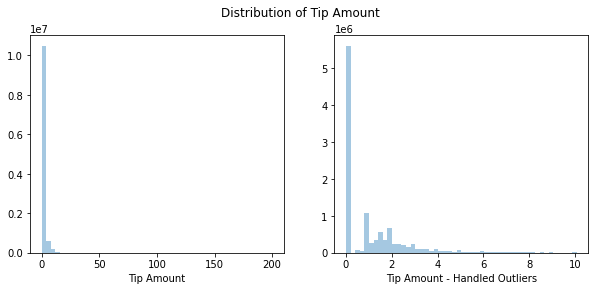

In [36]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(trips.tip_amount, ax=ax[0], kde=False)
# Removed upper 1% tip_amounts 
ax[1] = sns.distplot(amount.tip_amount, ax=ax[1], kde=False)
ax[0].set_xlabel('Tip Amount')
ax[1].set_xlabel('Tip Amount - Handled Outliers')
fig.suptitle('Distribution of Tip Amount')
plt.show()

There are lot of trips with tip amount =0 which makes sense as tips are upto a person and some of them might not even be reported as they could be given in cash.

# e.	What is the distribution of total amount?

In [37]:
trips.total_amount.describe()

count   11308202.00000
mean          14.18536
std           11.30906
min            2.50000
25%            7.80000
50%           10.50000
75%           15.50000
max          500.00000
Name: total_amount, dtype: float64

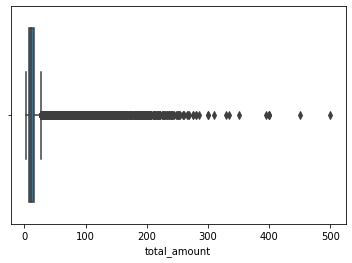

In [38]:
sns.boxplot(x=trips.total_amount)
plt.show()

In [39]:
# Remove upper 1% of points
p_upper = np.percentile(trips.total_amount, 99.0)
p_upper

amount = trips[trips.total_amount<p_upper]

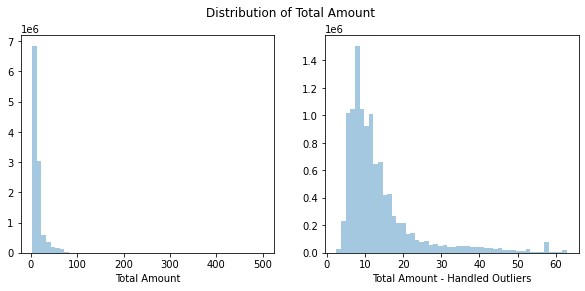

In [40]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(trips.total_amount, ax=ax[0], kde=False)
# Removed upper 1% total_amounts 
ax[1] = sns.distplot(amount.total_amount, ax=ax[1], kde=False)
ax[0].set_xlabel('Total Amount')
ax[1].set_xlabel('Total Amount - Handled Outliers')
fig.suptitle('Distribution of Total Amount')
plt.show()

# f. What are top 5 busiest hours of the day?


In [41]:
# Use hour of the pickup_datetime to assign a trip to that particular hour
trip_hours = trips.groupby(trips.pickup_datetime.dt.hour).size().sort_values(ascending=False)[:5].reset_index()
trip_hours

,pickup_datetime,0
0,19,707049
1,18,697247
2,20,670283
3,21,645135
4,22,626320


In [42]:
trip_hours.rename(columns = {'pickup_datetime':'time_of_day',0:'count'}, inplace=True)
trip_hours = trip_hours.sort_values(by='time_of_day')
trip_hours.replace({'time_of_day':{18:'6 PM',19:'7 PM',20:'8 PM',21:'9 PM',22:'10 PM'}},inplace=True)
trip_hours.set_index('time_of_day',inplace=True)

trip_hours

,count
time_of_day,
6 PM,697247
7 PM,707049
8 PM,670283
9 PM,645135
10 PM,626320


Hence, 6-11 pm are the 5 busiest hours of the day.

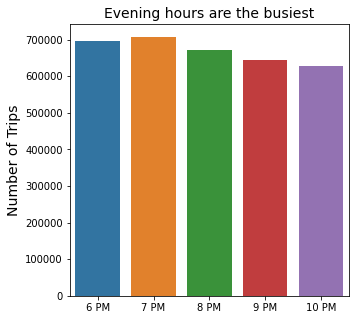

In [43]:
(fig, ax) = plt.subplots(figsize=(5,5))
ax = sns.barplot(x=trip_hours.index,y='count', data=trip_hours)
ax.set_title('Evening hours are the busiest', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Number of Trips', fontsize=14)

plt.show()

# g. What are the top 10 busiest locations of the city?

In [44]:
# Create a subset of dataframe for anaylsis
geo_data = trips[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']]

# Round off lat and long to two decimal places to get places at a more reasonable scale
geo_data['pickup_latitude'] = geo_data.pickup_latitude.round(2)
geo_data['pickup_longitude'] = geo_data.pickup_longitude.round(2)
geo_data['dropoff_latitude'] = geo_data.dropoff_latitude.round(2)
geo_data['dropoff_longitude'] = geo_data.dropoff_longitude.round(2)

# Create lat,long pairs for pickup and dropoff
geo_data['pickup_geocode'] = geo_data.pickup_latitude.astype(str) + ', ' + geo_data.pickup_longitude.astype(str)
geo_data['dropoff_geocode'] = geo_data.dropoff_latitude.astype(str) + ', ' + geo_data.dropoff_longitude.astype(str)

geo_data.head()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,pickup_geocode,dropoff_geocode
0,40.77000,-73.96000,40.79000,-73.98000,"40.77, -73.96","40.79, -73.98"
1,40.76000,-73.98000,40.78000,-73.96000,"40.76, -73.98","40.78, -73.96"
2,40.75000,-73.99000,40.75000,-73.99000,"40.75, -73.99","40.75, -73.99"
3,40.76000,-73.99000,40.75000,-73.98000,"40.76, -73.99","40.75, -73.98"
4,40.76000,-73.98000,40.76000,-73.98000,"40.76, -73.98","40.76, -73.98"


In [45]:
pickup = geo_data.pickup_geocode.value_counts().reset_index()
pickup

,index,pickup_geocode
0,"40.76, -73.97",842844
1,"40.75, -73.99",695346
2,"40.76, -73.98",671744
3,"40.75, -73.98",656819
4,"40.74, -73.99",560206
...,...,...
1482,"40.61, -73.66",1
1483,"40.95, -73.82",1
1484,"40.78, -73.58",1
1485,"40.96, -73.69",1


In [46]:
dropoff = geo_data.dropoff_geocode.value_counts().reset_index()
dropoff

,index,dropoff_geocode
0,"40.76, -73.97",773500
1,"40.76, -73.98",733027
2,"40.75, -73.98",652210
3,"40.75, -73.99",649942
4,"40.74, -73.99",485188
...,...,...
2113,"40.77, -73.48",1
2114,"40.33, -73.71",1
2115,"40.26, -73.89",1
2116,"40.87, -73.64",1


In [47]:
geolocator = Nominatim(user_agent="cba")

def get_address(geocode):
    '''
        Given co-ordinates, gets the address using geolocator
    '''
    location = geolocator.reverse(geocode)
    addr = location.address
    return str(addr)

In [48]:
locations = pd.merge(pickup, dropoff, how='outer')
locations = locations.fillna(0)
locations['num_trips'] = locations['pickup_geocode'] + locations['dropoff_geocode']
locations['num_trips'] = locations['num_trips'].astype(int)
locations.drop(columns=['pickup_geocode','dropoff_geocode'],inplace=True)
locations.rename(columns={'index':'geocode'},inplace=True)
locations.set_index('geocode',inplace=True)
locations = locations.sort_values(by='num_trips',ascending=False)[:10]
locations['address'] = locations.index.map(get_address)
locations

,num_trips,address
geocode,,
"40.76, -73.97",1616344,"664, Lexington Avenue, Manhattan Community Board 5, Manhattan, New York County, New York, 10022, United States"
"40.76, -73.98",1404771,"Rockefeller Center, 45, Rockefeller Plaza, Midtown, Manhattan Community Board 5, Manhattan, New York County, New York, 10111, United States"
"40.75, -73.99",1345288,"137, West 33rd Street, Manhattan Community Board 5, Manhattan, New York County, New York, 10001, United States"
"40.75, -73.98",1309029,"35, East 38th Street, Murray Hill, Manhattan Community Board 6, Manhattan, New York County, New York, 10016, United States"
"40.74, -73.99",1045394,"10, East 21st Street, Manhattan Community Board 5, Manhattan, New York County, New York, 10010, United States"
"40.76, -73.99",1012866,"341, West 45th Street, Theater District, Hell's Kitchen, Manhattan, New York County, New York, 10036, United States"
"40.77, -73.96",967815,"Dallas BBQ, 1265, 3rd Avenue, Carnegie Hill, Manhattan Community Board 8, Manhattan, New York County, New York, 10021, United States"
"40.77, -73.98",819244,"Central Park Outer Loop, Manhattan, New York County, New York, 10023-7503, United States"
"40.73, -73.99",779278,"51 Astor Place, East 9th Street, East Village, Manhattan Community Board 3, Manhattan, New York County, New York, 10003, United States"


In [49]:
import folium
m=folium.Map(location=[40.730610, -73.935242],zoom_start = 12,tiles='cartodbpositron')

In [50]:
for index,row in locations.iterrows():
    folium.Marker([float(index.split(',')[0]), float(index.split(',')[1])], popup=row["address"]).add_to(m)

In [51]:
m

# h. Which trip has the highest standard deviation of travel times?

Lets calculate the minimum number of trips(i.e. from pickup to dropoff) required to be included for the standard deviation analysis.

Assume, 
* Margin of Error = 5% 
* Confidence Interval = 95% => z-score = 1.96
* Standard Deviation = 0.5(say)

Hence, Number of trips = 385 

In [52]:
# Create a subset of dataframe for anaylsis
trip_df = trips[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','trip_time_in_secs','fare_amount']]

# Round off lat and long to two decimal places to get places at a more reasonable scale
trip_df['pickup_latitude'] = trip_df.pickup_latitude.round(2)
trip_df['pickup_longitude'] = trip_df.pickup_longitude.round(2)
trip_df['dropoff_latitude'] = trip_df.dropoff_latitude.round(2)
trip_df['dropoff_longitude'] = trip_df.dropoff_longitude.round(2)

# Create lat,long pairs for pickup and dropoff
trip_df['pickup_geocode'] = trip_df.pickup_latitude.astype(str) + ', ' + trip_df.pickup_longitude.astype(str)
trip_df['dropoff_geocode'] = trip_df.dropoff_latitude.astype(str) + ', ' + trip_df.dropoff_longitude.astype(str)

# Creating routes with a combination of pickup and dropoff codes
trip_df['route'] = trip_df.pickup_geocode + ' : ' + trip_df.dropoff_geocode

# Drop columns
trip_df.drop(columns=['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],inplace=True)

# Filter out routes with less than 385 trips
trip_df = trip_df.groupby('route').filter(lambda x: len(x) >= 385)

trip_df.head()

,trip_time_in_secs,fare_amount,pickup_geocode,dropoff_geocode,route
0,759,11.00000,"40.77, -73.96","40.79, -73.98","40.77, -73.96 : 40.79, -73.98"
1,799,10.00000,"40.76, -73.98","40.78, -73.96","40.76, -73.98 : 40.78, -73.96"
2,189,4.50000,"40.75, -73.99","40.75, -73.99","40.75, -73.99 : 40.75, -73.99"
3,354,6.50000,"40.76, -73.99","40.75, -73.98","40.76, -73.99 : 40.75, -73.98"
4,635,7.50000,"40.76, -73.98","40.76, -73.98","40.76, -73.98 : 40.76, -73.98"


In [53]:
# Trip with highest std of travel time
res = trip_df.groupby('route')['trip_time_in_secs'].std().sort_values(ascending=False)[:1]
res

route
40.65, -73.79 : 40.65, -73.79   1430.94447
Name: trip_time_in_secs, dtype: float64

In [54]:
#Route pickup address
pickup_addr = get_address(res.index[0].split(':')[0])
print(f'Pickup Address = {pickup_addr}')

#Route dropoff address
drop_addr = get_address(res.index[0].split(':')[1])
print(f'Dropoff Address = {drop_addr}')

Pickup Address = JFK Terminal 8, Terminal 8 Parking, Queens, Queens County, New York, 11430, United States
Dropoff Address = JFK Terminal 8, Terminal 8 Parking, Queens, Queens County, New York, 11430, United States


It looks like internal airport travel has the highest standard deviation

# i. Which trip has the most consistent fares?

The trip with lowest standard deviation of fare amount will be considered most consistent.

In [56]:
res = trip_df.groupby('route')['fare_amount'].std().sort_values(ascending=True)[:1]
res

route
40.79, -73.97 : 40.64, -73.79   0.37167
Name: fare_amount, dtype: float64

In [57]:
#Route pickup address
pickup_addr = get_address(res.index[0].split(':')[0])
print(f'Pickup Address = {pickup_addr}')

#Route dropoff address
drop_addr = get_address(res.index[0].split(':')[1])
print(f'Dropoff Address = {drop_addr}')

Pickup Address = 101, West 91st Street, Upper West Side, Manhattan Community Board 7, Manhattan, New York County, New York, 10025, United States
Dropoff Address = 65, Terminal 2 Departures, Queens, Queens County, New York, 11430, United States
